# ACC_PID_Simulation

## Import Libararies


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Vehicle Class

In [2]:
class vehicle:
    def __init__ (self, initial_position, initial_speed):
        self.position = initial_position
        self.speed = initial_speed
    
    def update_position (self, acceleration, dt):
        self.speed = self.speed + acceleration *dt 
        self.position = self.position + self.speed *dt

        

## ACC Class

In [3]:
class ACC_Trip:

    def __init__ (self, kp, ki, kd, saftey_distance):

        self.kp = kp
        self.kd = kd
        self.ki = ki
        self.saftey_distance = saftey_distance
        self.previous_error = 0
        self.integral = 0
    
    def accleration_computing (self, distance, dt ): 

        # calculation of PID controller
        error = self.saftey_distance - distance

       
        if error <= 0:

            return 0

        self.integral = self.integral + (error + self.previous_error)/2 *dt
        derivative =  (error - self.previous_error)/dt
        self.previous_error = error 
        
        return self.kp* error + self.ki * self.integral + self.kd* derivative
     


## simulation parameters


In [4]:
simulation_time = 10
dt = 0.1
steps = int(simulation_time/dt)

## vehicles definition

In [5]:
# we have 2 vehicles a lead and a following

lead_vehicle = vehicle(20, 50) #speed in m/s
following_vehicle = vehicle(15,50) #speed in m/s


## ACC definition

In [6]:
# acc = ACC_Trip (-0.5, 0.1, 0.05, 10)
acc = ACC_Trip (-1, 0.1, 0.05, 10)
#acc = ACC_Trip (-0.5, 0.1, 0.01, 10)


## arrays initiallization


In [7]:
lead_positions = []
following_positions = []
distances = []
following_velocity = []
following_acceleration = []
errortoprint = []

In [8]:


np.set_printoptions(precision=2)

for i in range(steps):
    distance = lead_vehicle.position - following_vehicle.position
    relative_velocity = lead_vehicle.speed - following_vehicle.speed
    acceleration = acc.accleration_computing(distance, relative_velocity,dt)

    lead_vehicle.update_position(0, dt)
    following_vehicle.update_position(acceleration,dt)

    #append Data
    errortoprint.append (acc.previous_error)
    lead_positions.append(lead_vehicle.position)
    following_positions.append(following_vehicle.position)
    distances.append(distance)
    following_velocity.append(following_vehicle.speed)
    following_acceleration.append(acceleration)
    

In [13]:
print("Distances:", [round(d, 2) for d in distances])

Distances: [5, 5.02, 5.1, 5.22, 5.39, 5.6, 5.86, 6.15, 6.49, 6.85, 7.24, 7.66, 8.1, 8.56, 9.03, 9.5, 9.98, 10.45, 10.93, 11.4, 11.87, 12.35, 12.82, 13.29, 13.77, 14.24, 14.72, 15.19, 15.66, 16.14, 16.61, 17.09, 17.56, 18.03, 18.51, 18.98, 19.45, 19.93, 20.4, 20.88, 21.35, 21.82, 22.3, 22.77, 23.24, 23.72, 24.19, 24.67, 25.14, 25.61, 26.09, 26.56, 27.03, 27.51, 27.98, 28.46, 28.93, 29.4, 29.88, 30.35, 30.83, 31.3, 31.77, 32.25, 32.72, 33.19, 33.67, 34.14, 34.62, 35.09, 35.56, 36.04, 36.51, 36.98, 37.46, 37.93, 38.41, 38.88, 39.35, 39.83, 40.3, 40.77, 41.25, 41.72, 42.2, 42.67, 43.14, 43.62, 44.09, 44.56, 45.04, 45.51, 45.99, 46.46, 46.93, 47.41, 47.88, 48.36, 48.83, 49.3]


In [15]:
print("Following Vehicle Acceleration:", [round(a, 2) for a in following_acceleration])

Following Vehicle Acceleration: [-2.47, -4.91, -4.81, -4.67, -4.48, -4.24, -3.96, -3.65, -3.3, -2.91, -2.51, -2.07, -1.62, -1.16, -0.68, -0.21, 0.27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
print("Following Vehicle Velocity:", [round(v, 2) for v in following_velocity])

Following Vehicle Velocity: [49.75, 49.26, 48.78, 48.31, 47.87, 47.44, 47.05, 46.68, 46.35, 46.06, 45.81, 45.6, 45.44, 45.32, 45.26, 45.23, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26, 45.26]


## Plot Results


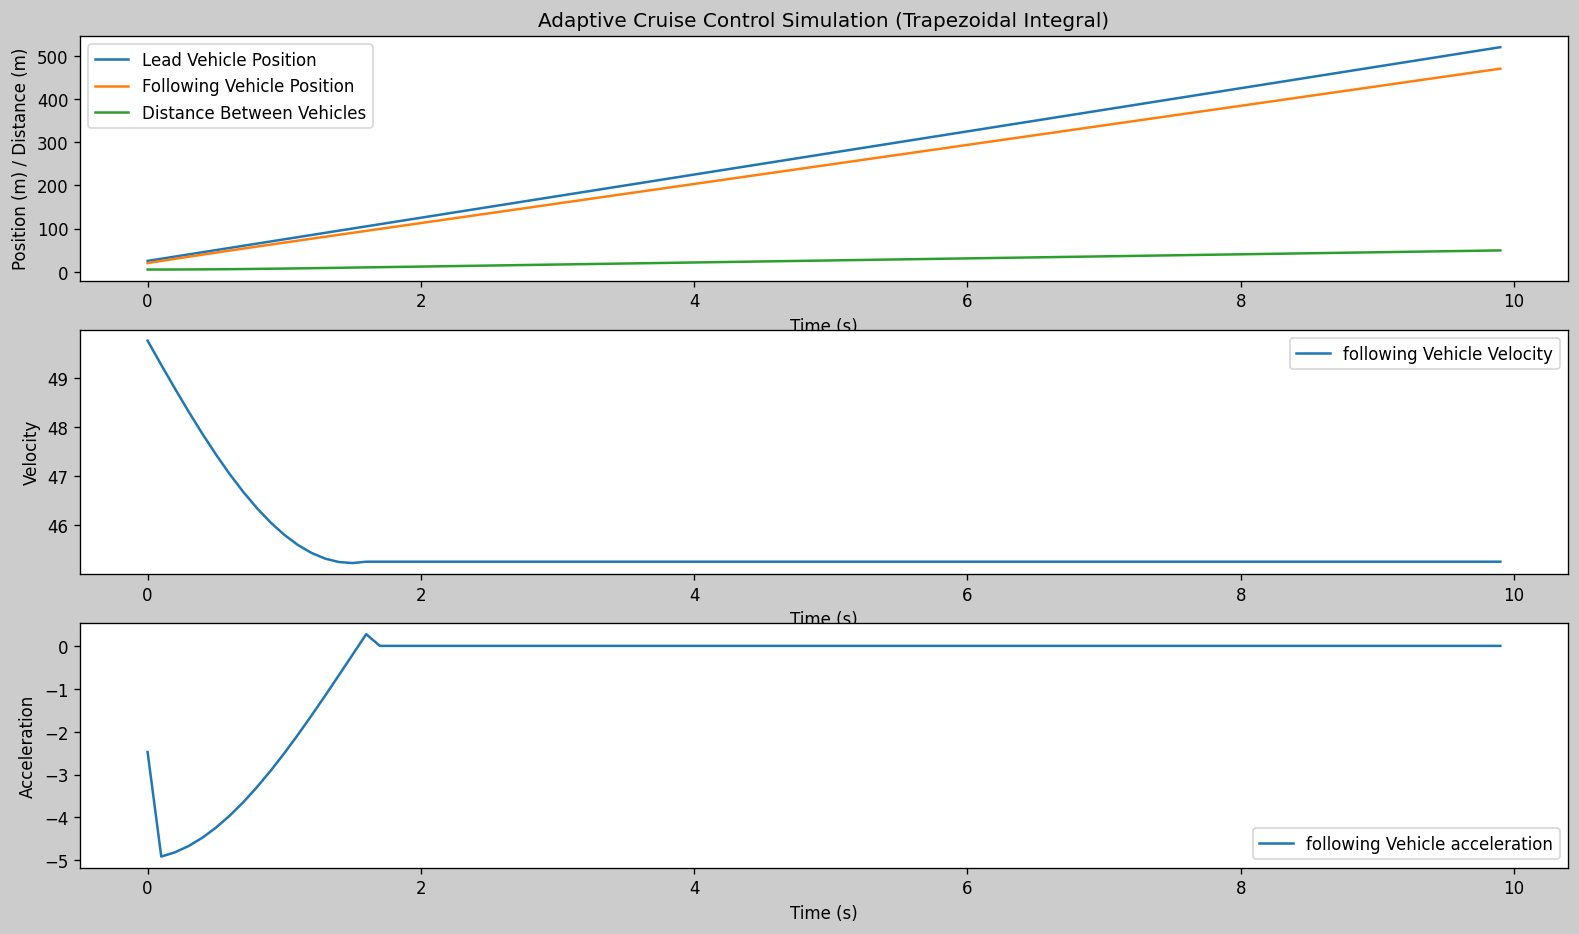

In [12]:
fig = plt.figure(figsize=(16,9),dpi=120,facecolor=(0.8,0.8,0.8))
gs=gridspec.GridSpec(3,1)

fig_1 = fig.add_subplot(gs[0,0])
plt.plot(np.arange(steps) * dt, lead_positions, label='Lead Vehicle Position')
plt.plot(np.arange(steps) * dt, following_positions, label='Following Vehicle Position')
plt.plot(np.arange(steps) * dt, distances, label='Distance Between Vehicles')
plt.xlabel('Time (s)')
plt.ylabel('Position (m) / Distance (m)')
plt.legend()
plt.title('Adaptive Cruise Control Simulation (Trapezoidal Integral)')

fig_2 = fig.add_subplot(gs[1,0])
plt.plot(np.arange(steps) * dt, following_velocity, label='following Vehicle Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity')
plt.legend()

fig_2 = fig.add_subplot(gs[2,0])
plt.plot(np.arange(steps) * dt, following_acceleration, label='following Vehicle acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.legend()



plt.show()

